# SYD DAT 7 - Clustering and Trees

* For the following, continue to use the github repository you made for your project
* You don't have to use the same data that you used from the previous homework assignment if
  you have decided to change what your project is about.
* Identify some attributes where you would expect clustering to be successful.
* Try two or more different clustering algorithms, and experiment with
  different numbers of clusters.
* If the clustering works well, try to give descriptive names for the
  different clusters you have found. If the clustering isn't
  successful, try to hypothesise why your data is some homogenous (and
  try clustering on different attributes).
* Try building decision trees on your data. If you think simplicity
  would be good, try to make it as simple as possible. If you think
  accuracy is more important, use ensembling or any other techniques
  that you have learned.
* Evaluate the success of your model (you can use another model from another
  assigment if this doesn't work well).



##### I am using the data from the previous assignment

The data is related to Car Expenses. It has 2899 records and 9 categories.

In [174]:
import pandas
import numpy
Exp_csv = pandas.read_csv('/Users/dianagalarza/Documents/DataScience/Project/SampleData_210_610.csv')
Exp = Exp_csv.fillna({'ID_ACC':'NA','ID_SUP':'NA', 'SOURCE':'NA', 'REF':'NA' })
Exp.head(5)

,GROUP,ID_ACC,SUB_GROUP,ID_SUP,ID_JOU,MONTH,SOURCE,REF,DESC,AUX1,DB,ID_CC,CATEGORY,VALUE,COUNT
0,CAR EXPENSES,62201115,210,P00000939,TES,8,SAP,0050003753,KR- 006 REEMBOLSO AGO 28,006,PPP,6578,210-006,2,1
1,CAR EXPENSES,62201916,210,P00001179,NOM,1,ADP,103,Gasolina,na,PPP,6578,210-001,8,1
2,CAR EXPENSES,62201916,210,P00001179,NOM,2,ADP,104,Gasolina,na,PPP,6578,210-001,8,1
3,CAR EXPENSES,62201916,210,P00001179,NOM,3,ADP,104,Gasolina,na,PPP,6578,210-001,8,1
4,CAR EXPENSES,62201916,210,P00001179,NOM,4,ADP,103,Gasolina,na,PPP,6578,210-001,8,1


In [175]:
Exp['ID_ACC'] = Exp['ID_ACC'].astype('category')
Exp['SUB_GROUP'] = Exp['SUB_GROUP'].astype('category')
Exp['MONTH'] = Exp['MONTH'].astype('category')
Exp['ID_CC'] = Exp['ID_CC'].astype('category')

In [176]:
Exp.shape

(2899, 15)

In [177]:
Exp.dtypes

GROUP          object
ID_ACC       category
SUB_GROUP    category
ID_SUP         object
ID_JOU         object
MONTH        category
SOURCE         object
REF            object
DESC           object
AUX1           object
DB             object
ID_CC        category
CATEGORY       object
VALUE           int64
COUNT           int64
dtype: object

#### Some visualization first:

In [178]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

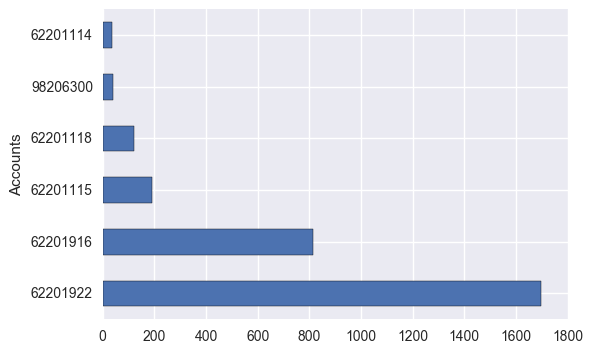

In [179]:
# Accounts
top_accounts = Exp.ID_ACC.value_counts()
top_accounts[:10].plot(kind='barh')
plt.ylabel('Accounts');

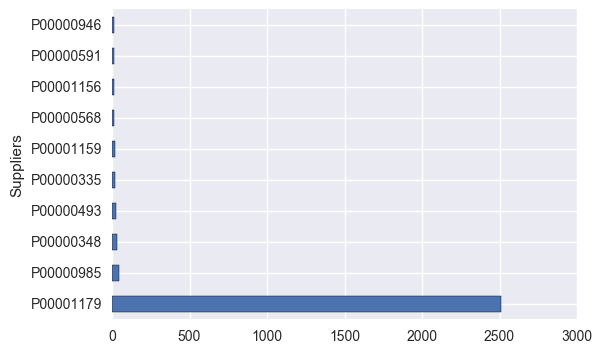

In [180]:
# Suppliers
top_suppliers = Exp.ID_SUP.value_counts()
top_suppliers[:10].plot(kind='barh')
plt.ylabel('Suppliers');

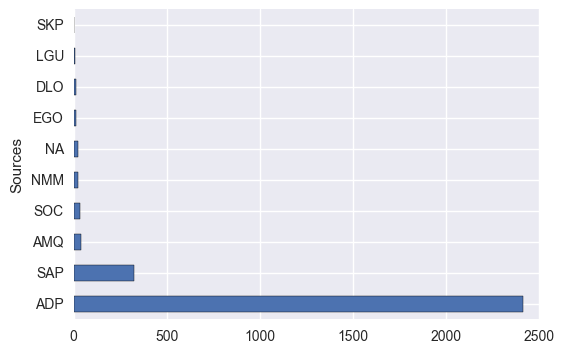

In [181]:
# Sources
top_sources = Exp.SOURCE.value_counts()
top_sources[:10].plot(kind='barh')
plt.ylabel('Sources');

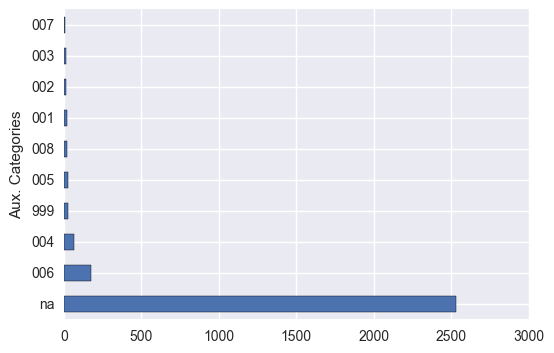

In [182]:
#Aux category. It could be the category, but it is not always correct.
top_aux = Exp.AUX1.value_counts()
top_aux[:10].plot(kind='barh')
plt.ylabel('Aux. Categories');

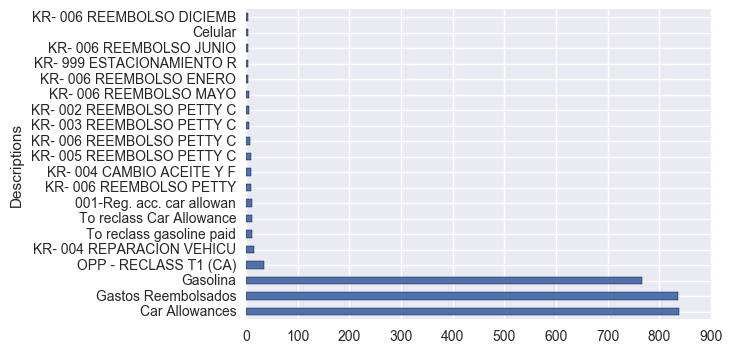

In [183]:
#Descriptions
top_descriptions = Exp.DESC.value_counts()
top_descriptions[:20].plot(kind='barh')
plt.ylabel('Descriptions');

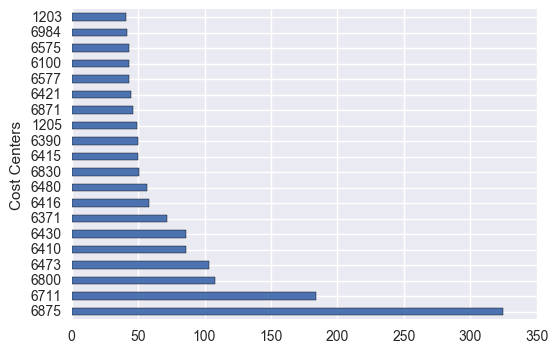

In [184]:
# COST CENTER
top_cost_centers = Exp.ID_CC.value_counts()
top_cost_centers[:20].plot(kind='barh')
plt.ylabel('Cost Centers');

###### selecting the attributes:
I did a group by of all data in Excel (similar as the table below) and I got a very interesting result.  For most I did a group by of all data in Excel (similar as the table below) and I got a very interesting result.  For most cases (99%), it was possible to assign the correct category using: account, supplier, cost_center, source, and aux. For example, the account 62201922 is always related to the category  210-001 (that solves 1696 out of the 2899 data points). 

For this group of expenses (car expenses), there were only a couple of cases where I needed the description to assign the category.  It means there is no random selection of categories and I should be able to perform the classification :)
 
For other groups, I will need other columns and I will need to work more with descriptions.  For this clustering and decision tree excersise this sample could work nicely. 


In [222]:
#Group by of most relevant attributes.
Exp[['ID_ACC','ID_SUP', 'ID_CC', 'SOURCE', 'AUX1',  'CATEGORY','COUNT']].groupby(['ID_ACC','ID_SUP', 'ID_CC', 'SOURCE', 'AUX1','CATEGORY']).agg(['count'])

COUNT
                                              count
ID_ACC   ID_SUP    ID_CC SOURCE AUX1 CATEGORY      
62201114 P00000308 6830  TRONA  na   210-999      1
         P00000348 1101  SOC    008  210-008      1
                   6100  SOC    008  210-008      6
                   6102  SOC    008  210-008      1
                   6570  SOC    008  210-008      2
                   6710  SOC    008  210-008      2
                   6711  SOC    003  210-006      1
                                004  210-004      1
                                007  210-007      5
                                999  210-007      1
                   6800  SOC    008  210-008      1
                   6821  SOC    007  210-007      1
                   6830  SOC    008  210-008      1
                                999  210-999      2
                   6871  SOC    008  210-008      2
                                999  210-999      8
62201115 P00000907 6430  SAP    006  210-006      4
         P00000908 6473  SAP    006  210-006      7
         P00000911 6421  SAP    006  210-006      1
         P00000913 6415  SAP    006  210-006      2
                                007  210-006      1
         P00000916 6836  SAP    999  210-999      1
         P00000923 6830  SAP    006  210-006      1
         P00000927 6800  SAP    006  210-006      1
         P00000932 6416  SAP    006  210-006      4
         P00000934 6415  SAP    005  210-005      1
         P00000937 6430  SAP    006  210-006      1
         P00000939 6578  SAP    006  210-006      3
         P00000946 6410  SAP    006  210-006      8
                   6415  SAP    006  210-006      2
...                                             ...
62201922 P00001179 6579  AMQ    na   210-001      1
                   6710  ADP    na   210-001     24
                   6711  ADP    na   210-001     24
                   6712  ADP    na   210-001      8
                   6715  ADP    na   210-001     24
                   6770  ADP    na   210-001     24
                   6771  ADP    na   210-001     24
                   6800  ADP    na   210-001     70
                         AMQ    na   210-001      2
                   6805  ADP    na   210-001     24
                   6818  ADP    na   210-001     24
                   6830  ADP    na   210-001     24
                         AMQ    na   210-001      1
                   6836  ADP    na   210-001     24
                         AMQ    na   210-001      1
                   6840  ADP    na   210-001     24
                   6871  ADP    na   210-001     24
                   6875  ADP    na   210-001    207
                         AMQ    na   210-001      1
                         NA     na   210-001      8
                   6984  ADP    na   210-001      8
                         EGO    na   210-001      2
                         NMM    na   210-001     12
98206300 P00000985 6821  HEF    999  210-999      1
         P00001163 6821  SAP    999  210-999      1
         P00001179 6821  ADP    na   210-001     29
                                     210-999      3
                         EGO    na   210-001      2
                         EJC    na   210-006      1
                         HEF    na   210-007      2

[291 rows x 1 columns]

###### Pre-processing
Using labelEncoder and pandas.get_dummies. I decided to use pandas.get_dummies because it gave me the sparse option for dataframes. When I tried to use hot-encoder with sparse=True it returns a sparse matrix, that I didn't know how to merge with the original dataframe. However, I got an error using the sparse dataframe when plotting results, so I tested the performance without the sparse option and it also worked ok.

In [223]:
import sklearn.preprocessing

In [224]:
label_coder = sklearn.preprocessing.LabelEncoder()

In [353]:
Exp['category'] = label_coder.fit_transform(Exp.CATEGORY)
Exp['id_acc'] = label_coder.fit_transform(Exp.ID_ACC)
Exp['id_sup'] = label_coder.fit_transform(Exp.ID_SUP)
Exp['id_cc'] = label_coder.fit_transform(Exp.ID_CC)
Exp['source'] = label_coder.fit_transform(Exp.SOURCE)
Exp['aux1'] = label_coder.fit_transform(Exp.AUX1)
Exp.head()

,GROUP,ID_ACC,SUB_GROUP,ID_SUP,ID_JOU,MONTH,SOURCE,REF,DESC,AUX1,...,ID_CC,CATEGORY,VALUE,COUNT,category,id_acc,id_sup,id_cc,source,aux1
0,CAR EXPENSES,62201115,210,P00000939,TES,8,SAP,0050003753,KR- 006 REEMBOLSO AGO 28,006,...,6578,210-006,2,1,5,1,32,44,10,6
1,CAR EXPENSES,62201916,210,P00001179,NOM,1,ADP,103,Gasolina,na,...,6578,210-001,8,1,0,3,84,44,0,12
2,CAR EXPENSES,62201916,210,P00001179,NOM,2,ADP,104,Gasolina,na,...,6578,210-001,8,1,0,3,84,44,0,12
3,CAR EXPENSES,62201916,210,P00001179,NOM,3,ADP,104,Gasolina,na,...,6578,210-001,8,1,0,3,84,44,0,12
4,CAR EXPENSES,62201916,210,P00001179,NOM,4,ADP,103,Gasolina,na,...,6578,210-001,8,1,0,3,84,44,0,12


In [290]:
# Expenses dataframe with attributes (data) and target column
Exp_clean = Exp [['id_acc', 'id_sup', 'id_cc', 'source', 'aux1', 'category']]
Exp_clean_data = Exp [['id_acc', 'id_sup', 'id_cc', 'source', 'aux1']]
Exp_clean_target = Exp [['category']]
print Exp_clean.shape
print Exp_clean_data.shape
print Exp_clean_target.shape

(2899, 6)
(2899, 5)
(2899, 1)


In [339]:
# get_dummy to "pivot" data
Exp_data = pandas.get_dummies(Exp_clean_data, columns = ['id_acc', 'id_sup', 'id_cc', 'source', 'aux1'], sparse = False)
Exp_target = Exp_clean_target

## I had to run it again with sparse set to False to be able to plot the data.
# Otherwise I get a x,y size error when trying to plot 

In [340]:
print Exp_data.shape
print Exp_target.shape

(2899, 180)
(2899, 1)


In [341]:
Exp_data.head()

,id_acc_0,id_acc_1,id_acc_2,id_acc_3,id_acc_4,id_acc_5,id_sup_0,id_sup_1,id_sup_2,id_sup_3,...,aux1_3,aux1_4,aux1_5,aux1_6,aux1_7,aux1_8,aux1_9,aux1_10,aux1_11,aux1_12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [342]:
Exp_target.head()

,category
0,5
1,0
2,0
3,0
4,0


In [343]:
# columns with higher means
df = Exp_data.mean()
df [df > 0.2]

id_acc_3     0.280442
id_acc_4     0.585029
id_sup_84    0.865126
source_0     0.833391
aux1_12      0.872370
dtype: float64

#### Clustering

In [344]:
# KMeans with 9 clusters 

import sklearn.cluster
Exp_cluster = sklearn.cluster.KMeans(n_clusters=9, init='random')
Exp_cluster.fit(Exp_data)
y_kmeans = Exp_cluster.predict(Exp_data)

In [345]:
# get info on one cluster
import sklearn.metrics
for cluster_in_question in range(0,9):
    # get center of cluster
    "centroid", Exp_cluster.cluster_centers_[cluster_in_question]
    # grab categories in dataframe that belong to this cluster
    categories = Exp_data_target[numpy.where(y_kmeans == cluster_in_question, True, False)]['category']
    # look at top five qualities in cluster
    print sorted(zip(Exp_data_target.columns[1:], Exp_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6]
    print
 
sklearn.metrics.silhouette_score(Exp_data, Exp_cluster.labels_, metric='euclidean')   

[('source', 2.7755575615628914e-17), ('id_sup', 0.0), ('id_cc', -1.3877787807814457e-17), ('category', -3.3306690738754696e-16)]

[('category', 0.23529411764705821), ('source', 0.039215686274509817), ('aux1', 3.3306690738754696e-16), ('id_cc', -4.163336342344337e-17)]

[('aux1', 1.6653345369377348e-16), ('source', 2.0816681711721685e-17), ('id_sup', 0.0), ('id_cc', 0.0)]

[('aux1', 0.029850746268656247), ('source', 0.0099502487562189365), ('id_sup', 0.0), ('category', -1.4432899320127035e-15)]

[('category', 6.4392935428259079e-15), ('id_sup', 2.2898349882893854e-16), ('id_cc', -3.4694469519536142e-16), ('source', -7.5633943552588789e-16)]

[('category', 0.5), ('id_cc', 2.7755575615628914e-17), ('source', 1.3877787807814457e-17), ('id_sup', 0.0)]

[('aux1', 5.1625370645069779e-15), ('id_sup', 3.3653635433950058e-16), ('source', -1.2559397966072083e-15), ('id_cc', -1.3739009929736312e-15)]

[('aux1', 0.055555555555555247), ('category', 3.3306690738754696e-16), ('id_cc', 8.32667268468867

0.19415903939054313

In [335]:
# I'm not sure how to interpret the results above :(

In [346]:
# perform k means with up to 20 clusters
k_rng = range(1,20)
est = [sklearn.cluster.KMeans(n_clusters = k).fit(Exp_data) for k in k_rng]

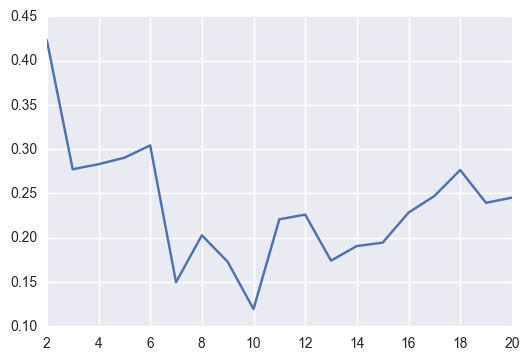

In [347]:
# What do these clusters look like?

scores = []
for  i in range (2, 21):
        clustereri =  sklearn.cluster.KMeans(n_clusters=i)
        cluster_suggestionsi = clustereri.fit_predict(Exp_data)
        scores.append (sklearn.metrics.silhouette_score(Exp_data, cluster_suggestionsi))
#scores

%matplotlib inline
plt.plot(range(2,21),scores)

In [266]:
# The elbow could be 6

In [371]:
import sklearn.cluster
Exp_cluster = sklearn.cluster.KMeans(n_clusters=6, init='random')
Exp_cluster.fit(Exp_data)
y_kmeans = Exp_cluster.predict(Exp_data)

numpy.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5], dtype=int32)

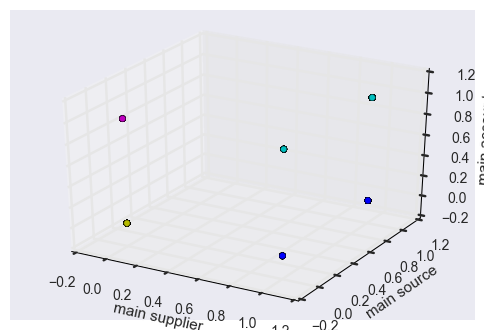

In [385]:
#3D plot -- I tried to plot the columns/attributes with the largest count, 
# but I couldn't figure out a good way to visualise clusters
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

colors = numpy.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = numpy.hstack([colors] * 20)
colour_by_cluster = colors[y_kmeans]

x = numpy.array(Exp_data.id_sup_84)
y = numpy.array(Exp_data.source_0)
z = numpy.array(Exp_data.id_acc_4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colour_by_cluster)
ax.set_xlabel('main supplier')
ax.set_ylabel('main source')
ax.set_zlabel('main account')
plt.show()

In [377]:
# DBSCAN

dbscan = sklearn.cluster.DBSCAN(eps = 0.4, min_samples = 3)
dbscan_suggestions = dbscan.fit_predict(Exp_data)
dbscan_suggestions

array([  0,   1,   1, ..., 157, 157,  -1])

In [378]:
#clusters found
numpy.unique(dbscan_suggestions)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157])

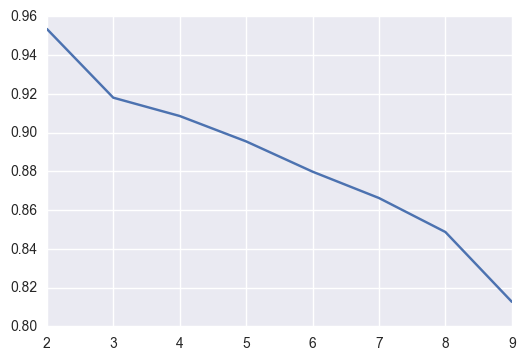

In [379]:
# What do these clusters look like?

scores = []
for  i in range (2, 10):
        dbscani =  sklearn.cluster.DBSCAN(eps = 0.4, min_samples = i)
        dbscan_suggestionsi = dbscani.fit_predict(Exp_data)
        scores.append (sklearn.metrics.silhouette_score(Exp_data, dbscan_suggestionsi))
#scores

%matplotlib inline
plt.plot(range(2,10),scores)

In [380]:
# Elbow in min_sample = 3

In [381]:
dbscan = sklearn.cluster.DBSCAN(eps = 0.4, min_samples = 3)
dbscan_suggestions = dbscan.fit_predict(Exp_data)
dbscan_suggestions

array([  0,   1,   1, ..., 157, 157,  -1])

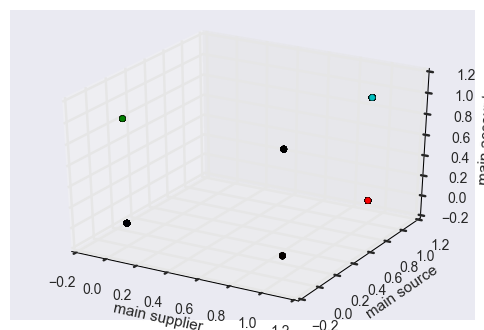

In [386]:
#3D plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

colors = numpy.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = numpy.hstack([colors] * 20)
colour_by_cluster = colors[dbscan_suggestions]

x = numpy.array(Exp_data.id_sup_84)
y = numpy.array(Exp_data.source_0)
z = numpy.array(Exp_data.id_acc_4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colour_by_cluster)
ax.set_xlabel('main supplier')
ax.set_ylabel('main source')
ax.set_zlabel('main account')
plt.show()

###### supervised learning using clusters

In [459]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Exp_data, Exp_target.category)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [449]:
import sklearn.cross_validation 
knc = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

(trainX, testX, trainY, testY) = sklearn.cross_validation.train_test_split(
 Exp_data, Exp_target.category
)

In [450]:
knc.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

0.986206896552


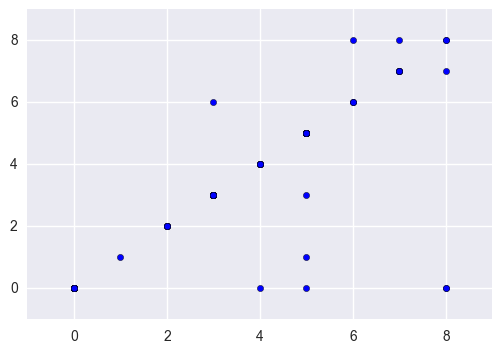

In [451]:
predictions = knc.predict(testX)
plt.scatter(testY,predictions)
print sklearn.metrics.accuracy_score(testY, predictions)

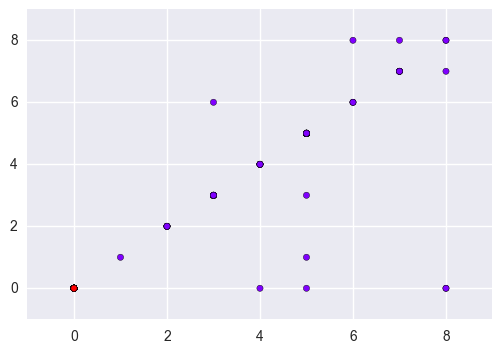

In [452]:
plt.scatter(testY,predictions,cmap=plt.cm.rainbow, c=testX.id_acc_4)
# This account should be the same category (if account = 62201922 then category = 210-001)

In [453]:
sklearn.cross_validation.cross_val_score(sklearn.neighbors.KNeighborsClassifier(),#or (n_neighbors = 10)
                                         Exp_data,
                                         Exp_target.category,
                                         cv = 10, #increasing this number may takes more time, but it could be more accurate
                                         scoring = 'accuracy'
                                         )

array([ 0.97952218,  0.97952218,  1.        ,  1.        ,  1.        ,
        0.99310345,  0.97577855,  0.98958333,  0.98601399,  0.98947368])

###### Bruteforce

In [454]:
import sklearn.grid_search

In [455]:
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}

BruteForce = sklearn.grid_search.GridSearchCV(
    sklearn.neighbors.KNeighborsClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv=25
)
BruteForce.fit(Exp_data, Exp_target.category)

GridSearchCV(cv=25, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [456]:
BruteForce.best_params_

{'n_neighbors': 1}

In [457]:
BruteForce.best_score_

0.99344601586754055

In [460]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(Exp_data, Exp_target.category)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

###### Dummy classifier

In [448]:
(trainX, testX, trainY, testY) = sklearn.cross_validation.train_test_split(
 Exp_data, Exp_target.category)

import sklearn.dummy
dumb = sklearn.dummy.DummyClassifier(strategy = 'most_frequent')
dumb.fit(trainX, trainY)
y_dumb_class = dumb.predict(testX)
print sklearn.metrics.accuracy_score(testY, y_dumb_class)


0.852413793103


###### Clustering conclusions

I was not able to visualise clusters in a way that help me understand if clusters work well.  Additionally, I think kmeans or dbscan might not be good for this kind of data with lots of attributes and many different densities.

A conclusion, kind of intuition or lack of understanding ;), K-neighbors of 1 should work well to predict my categories because there are many cases where "clusters of 1" is all I have to train my model, so I could say that this is a model where overfitting is not such a bad thing. Does it make any sense?


#### Decision Trees (pending...)